### Study to highlight the relationship between the existancede of PCS, the volume of the brain and the number of voxel.

You need BrainVisa to run this code. 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from soma import aims

#### Load the labels for the right and the left PCS on the ACCP dataset

In [3]:
labeled_ACCP = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/subjects_labels.csv")
labeled_ACCP = labeled_ACCP[['long_name','Left_PCS', 'Right_PCS']]

def encoder(df, columns):
    code = {'present':1,
            'absent':0}
    for col in columns:
        df[col] = df[col].map(code)
    return df

encoder(labeled_ACCP,['Left_PCS', 'Right_PCS'])
labeled_ACCP['long_name'].dtype

dtype('O')

#### Let's do it on both hemispheres at the same time

In [4]:
raw_skeleton_path = '/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/skeletons/raw/'
two_mm_skeleton_path = '/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/skeletons/2mm/'
list_path = [raw_skeleton_path,two_mm_skeleton_path]

In [5]:
vol = aims.read(f'{raw_skeleton_path}R/Rskeleton_generated_sub-inhibition16_ses-pretraining_T1w.nii.gz')
print(vol)

In [6]:
nb_vox = vol.np
print(nb_vox.shape)
print(np.count_nonzero(nb_vox))

(94, 227, 158, 1)
44959


In [7]:
dic = {}

for repo_path in list_path:
    for side in ['R', 'L']:
        nb_vox_dic = {}
        path = f"{repo_path}/{side}/"
        for file in os.listdir(path):
            if file.endswith('.nii.gz'):
                #print(file)
                #print(file[20:-7]) # to get the name of the subject
                vol = aims.read(f'{path}{file}')
                nb_vox = vol.np
                nb_vox_dic[file[20:-7]]= np.count_nonzero(nb_vox) # calculate the number of voxel that are not zeros
        dic[f'nb_vox_{side}_{repo_path[-4:-1]}'] = nb_vox_dic

In [8]:
for dicki in dic:
    df = pd.DataFrame({'long_name': list(dic[dicki].keys()), dicki: list(dic[dicki].values())})
    labeled_ACCP  = labeled_ACCP.merge(df, on='long_name', how='inner')

In [9]:
labeled_ACCP['nb_vox_tot_raw'] = labeled_ACCP['nb_vox_R_raw'] + labeled_ACCP['nb_vox_L_raw']
labeled_ACCP['nb_vox_tot_2mm'] = labeled_ACCP['nb_vox_R_2mm'] + labeled_ACCP['nb_vox_L_2mm']
labeled_ACCP

,long_name,Left_PCS,Right_PCS,nb_vox_R_raw,nb_vox_L_raw,nb_vox_R_2mm,nb_vox_L_2mm,nb_vox_tot_raw,nb_vox_tot_2mm
0,nih_chp_04701_t1,1,0,34085,33056,10341,9793,67141,20134
1,nih_chp_01534_t1,1,1,38788,38679,11454,11300,77467,22754
2,nih_chp_04623_t1,1,1,35938,34789,10874,10451,70727,21325
3,nih_chp_01503_t1,0,0,37814,36232,10991,10570,74046,21561
4,nih_chp_00404_t1,1,1,35481,34587,11476,11152,70068,22628
...,...,...,...,...,...,...,...,...,...
336,a0005_t1_s03,0,1,44527,43200,11170,10905,87727,22075
337,a0006_t1_s03,1,0,46430,46685,12117,12380,93115,24497
338,a0001_t1_s03,1,1,49438,49527,12877,13010,98965,25887
339,a0016_t1_s03,0,1,35292,36288,10265,10603,71580,20868


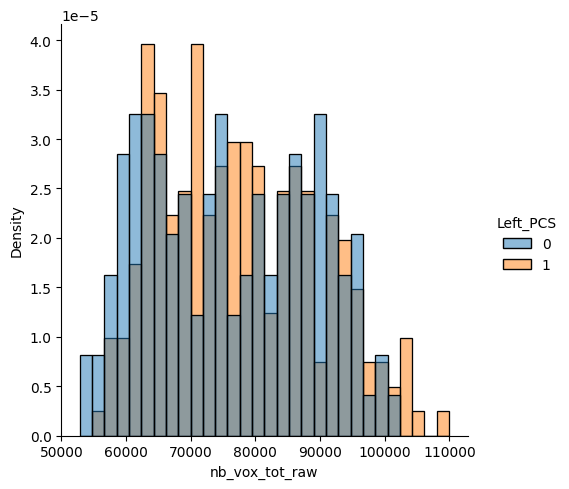

In [10]:
sns.displot(labeled_ACCP, x='nb_vox_tot_raw', hue='Left_PCS', bins=30, stat="density", common_norm=False)
plt.show()

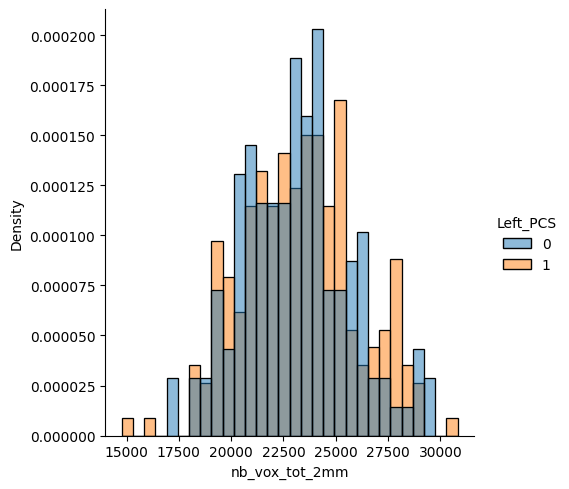

In [11]:
sns.displot(labeled_ACCP, x='nb_vox_tot_2mm', hue='Left_PCS', bins=30, stat="density", common_norm=False)
plt.show()

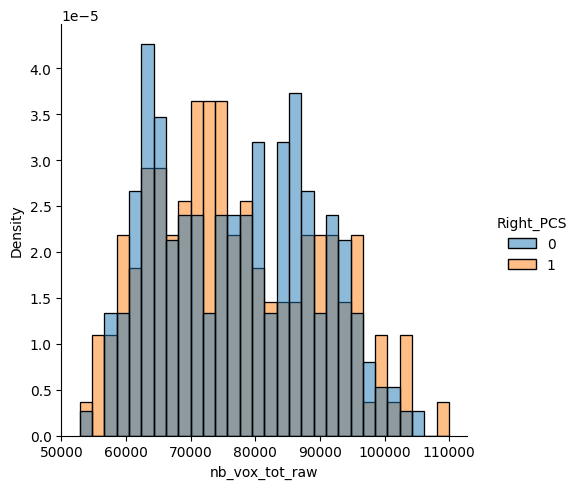

In [12]:
sns.displot(labeled_ACCP, x='nb_vox_tot_raw', hue='Right_PCS', bins=30, stat="density", common_norm=False)
plt.show()

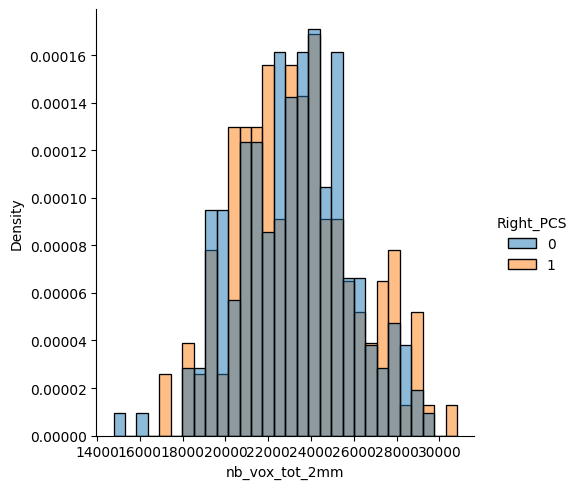

In [13]:
sns.displot(labeled_ACCP, x='nb_vox_tot_2mm', hue='Right_PCS', bins=30, stat="density", common_norm=False)
plt.show()